In [ ]:
## A cloth manufacturing company is interested to know about the segment or attributes causes high sale. 

# feature importance

In [1]:
import pandas as pd
import numpy as np

import matplotlib.pyplot as plt
%matplotlib inline

import seaborn as sns
sns.set()

In [2]:
# DT lib

from sklearn.tree import DecisionTreeClassifier

from sklearn import tree

# label Encoder
from sklearn.preprocessing import LabelEncoder

In [3]:
# divide the data 
from sklearn.model_selection import train_test_split

# checking Accuracy
from sklearn.metrics import accuracy_score

In [4]:
from sklearn.ensemble import RandomForestClassifier

## Preprocessing the Data

In [5]:
comp = pd.read_csv('Company_Data.csv')
comp.head()

,Sales,CompPrice,Income,Advertising,Population,Price,ShelveLoc,Age,Education,Urban,US
0,9.50,138,73,11,276,120,Bad,42,17,Yes,Yes
1,11.22,111,48,16,260,83,Good,65,10,Yes,Yes
2,10.06,113,35,10,269,80,Medium,59,12,Yes,Yes
3,7.40,117,100,4,466,97,Medium,55,14,Yes,Yes
4,4.15,141,64,3,340,128,Bad,38,13,Yes,No


In [6]:
comp.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 400 entries, 0 to 399
Data columns (total 11 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   Sales        400 non-null    float64
 1   CompPrice    400 non-null    int64  
 2   Income       400 non-null    int64  
 3   Advertising  400 non-null    int64  
 4   Population   400 non-null    int64  
 5   Price        400 non-null    int64  
 6   ShelveLoc    400 non-null    object 
 7   Age          400 non-null    int64  
 8   Education    400 non-null    int64  
 9   Urban        400 non-null    object 
 10  US           400 non-null    object 
dtypes: float64(1), int64(7), object(3)
memory usage: 34.5+ KB


In [7]:
comp[comp.duplicated()].shape

(0, 11)

In [8]:
# converting ShelveLoc,Urban & US 

label_encode = LabelEncoder()

comp['ShelveLoc'] = label_encode.fit_transform(comp['ShelveLoc'])
comp['Urban'] = label_encode.fit_transform(comp['Urban'])
comp['US'] = label_encode.fit_transform(comp['US'])

In [ ]:
# Sales is in continous in nature - converting it to categorical 

In [9]:
len(comp['Sales'].unique())

336

In [10]:
comp['Sales'].describe()

count    400.000000
mean       7.496325
std        2.824115
min        0.000000
25%        5.390000
50%        7.490000
75%        9.320000
max       16.270000
Name: Sales, dtype: float64

In [11]:
n = []

for i in comp['Sales']:
    
    if i < 5.39:
        n.append('Low')
    elif i < 9.32:
        n.append('Moderate')
    else:
        n.append('Premium')

In [12]:
comp.insert(0,column='Sales_Category',value=n)

In [13]:
comp.head()

,Sales_Category,Sales,CompPrice,Income,Advertising,Population,Price,ShelveLoc,Age,Education,Urban,US
0,Premium,9.50,138,73,11,276,120,0,42,17,1,1
1,Premium,11.22,111,48,16,260,83,1,65,10,1,1
2,Premium,10.06,113,35,10,269,80,2,59,12,1,1
3,Moderate,7.40,117,100,4,466,97,2,55,14,1,1
4,Low,4.15,141,64,3,340,128,0,38,13,1,0


In [14]:
comp.drop('Sales',axis=1,inplace=True)

In [15]:
comp.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 400 entries, 0 to 399
Data columns (total 11 columns):
 #   Column          Non-Null Count  Dtype 
---  ------          --------------  ----- 
 0   Sales_Category  400 non-null    object
 1   CompPrice       400 non-null    int64 
 2   Income          400 non-null    int64 
 3   Advertising     400 non-null    int64 
 4   Population      400 non-null    int64 
 5   Price           400 non-null    int64 
 6   ShelveLoc       400 non-null    int32 
 7   Age             400 non-null    int64 
 8   Education       400 non-null    int64 
 9   Urban           400 non-null    int32 
 10  US              400 non-null    int32 
dtypes: int32(3), int64(7), object(1)
memory usage: 29.8+ KB


In [16]:
comp['Sales_Category'].value_counts()

Moderate    198
Premium     102
Low         100
Name: Sales_Category, dtype: int64

<AxesSubplot:>

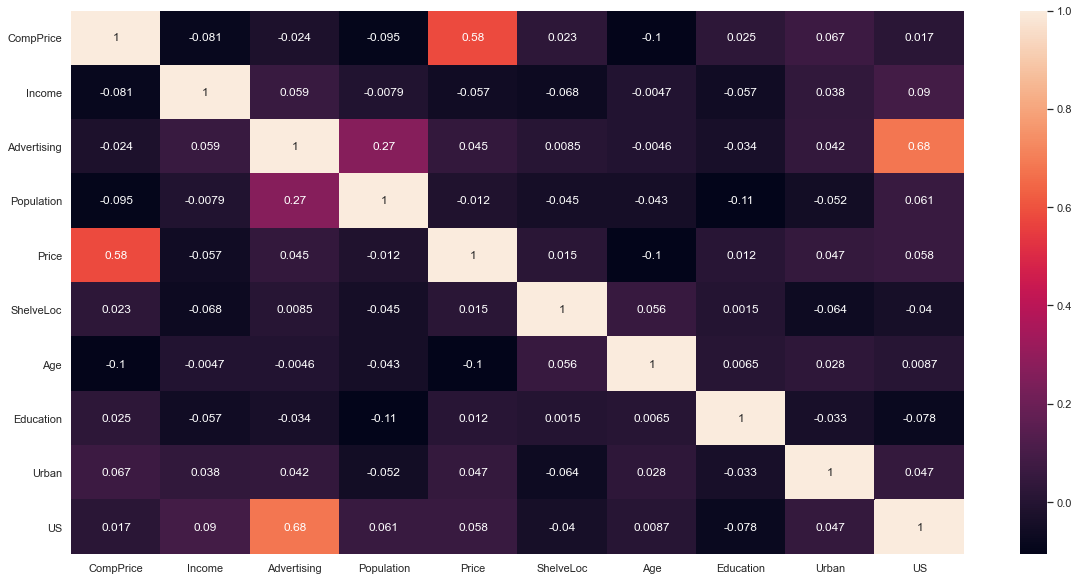

In [17]:
# All other variables are independent

plt.figure(figsize=(20,10))
sns.heatmap(comp.corr(),annot=True)

In [18]:
x = comp.iloc[:,1:]
y = comp.iloc[:,0]

In [19]:
# Splitting the Data
x_train,x_test,y_train,y_test =train_test_split(x,y,test_size=0.25,random_state=40)

### Building Decision Tree Classifier (CART) using Gini Criteria

In [20]:
# model form
model_gini = DecisionTreeClassifier(criterion='gini',max_depth=4,min_samples_split=5)

In [21]:
# fitting the data in model

model_gini.fit(x_train,y_train)

DecisionTreeClassifier(max_depth=4, min_samples_split=5)

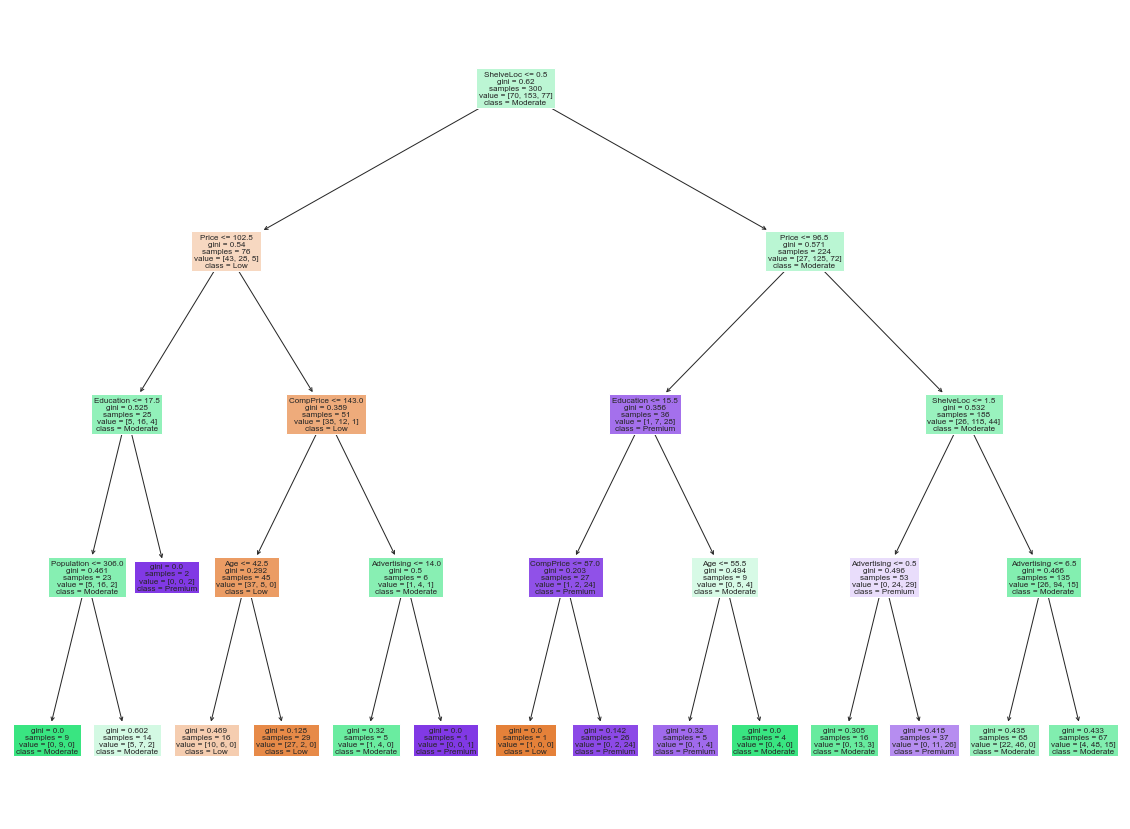

In [22]:
# plotting the tree

fn = ['CompPrice','Income','Advertising','Population','Price','ShelveLoc','Age','Education','Urban','US']
cn = ['Low','Moderate','Premium']
plt.figure(figsize=(20,15))

tree.plot_tree(model_gini,feature_names=fn,class_names=cn,filled=True);

In [23]:
# for Gini - Accuracy on Training Data

pred_gini_train = model_gini.predict(x_train)

acc_gini_train = accuracy_score(y_train,pred_gini_train)

print(f'The Accuracy by Gini Criteria on Training Data is {np.round(acc_gini_train,4)*100} %')

The Accuracy by Gini Criteria on Training Data is 75.33 %


In [24]:
# for Gini - Accuracy on Testing Data

pred_gini_test = model_gini.predict(x_test)

acc_gini_test = accuracy_score(y_test,pred_gini_test)

print(f'The Accuracy by Gini Criteria on Testing Data is {np.round(acc_gini_test,4)*100} %')

The Accuracy by Gini Criteria on Testing Data is 56.99999999999999 %


### Building Decision Tree Classifier (CART) using Entropy Criteria

In [25]:
# form of model
model_entropy = DecisionTreeClassifier(criterion='entropy',max_depth=4,min_samples_split=5)

In [26]:
# fitting the model

model_entropy.fit(x_train,y_train)

DecisionTreeClassifier(criterion='entropy', max_depth=4, min_samples_split=5)

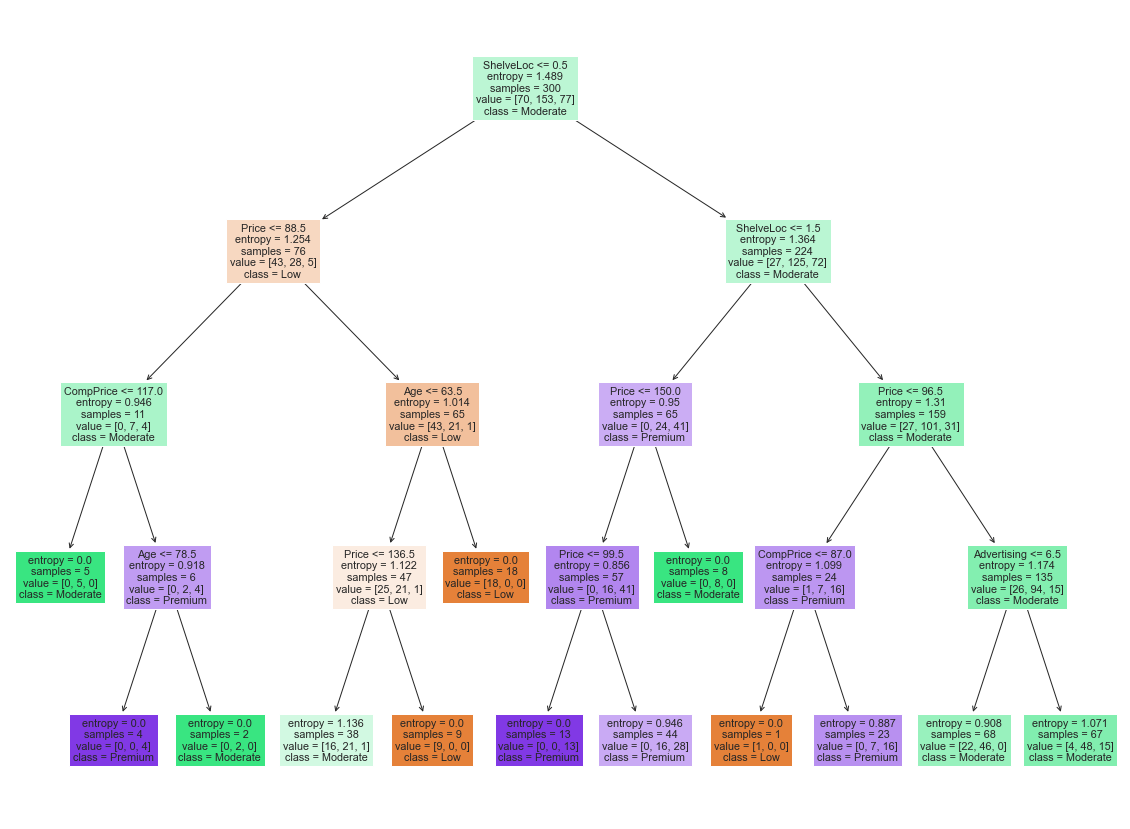

In [27]:
# plotting the tree

fn = ['CompPrice','Income','Advertising','Population','Price','ShelveLoc','Age','Education','Urban','US']
cn = ['Low','Moderate','Premium']
plt.figure(figsize=(20,15))

tree.plot_tree(model_entropy,feature_names=fn,class_names=cn,filled=True);

In [28]:
# for Entropy - Accuracy on Training Data

pred_entropy_train = model_entropy.predict(x_train)

acc_entropy_train = accuracy_score(y_train,pred_entropy_train )

print(f'The Accuracy by Entropy Criteria on Training Data is {np.round(acc_entropy_train,4)*100} %')

The Accuracy by Entropy Criteria on Training Data is 73.0 %


In [29]:
# for Entropy - Accuracy on Training Data

pred_entropy_test = model_entropy.predict(x_test)

acc_entropy_test = accuracy_score(y_test,pred_entropy_test )

print(f'The Accuracy by Entropy Criteria on Training Data is {np.round(acc_entropy_test,4)*100} %')

The Accuracy by Entropy Criteria on Training Data is 51.0 %


### Feature Selection - Segment or Attributes Causes High Sale. 

In [30]:
feature_imp = model_gini.feature_importances_
feature_imp

array([0.06827661, 0.        , 0.1424203 , 0.02717877, 0.28717483,
       0.34785764, 0.05953884, 0.067553  , 0.        , 0.        ])

In [31]:
feature = model_gini.feature_names_in_
feature

array(['CompPrice', 'Income', 'Advertising', 'Population', 'Price',
       'ShelveLoc', 'Age', 'Education', 'Urban', 'US'], dtype=object)

Text(0.5, 1.0, 'Gini Criteria')

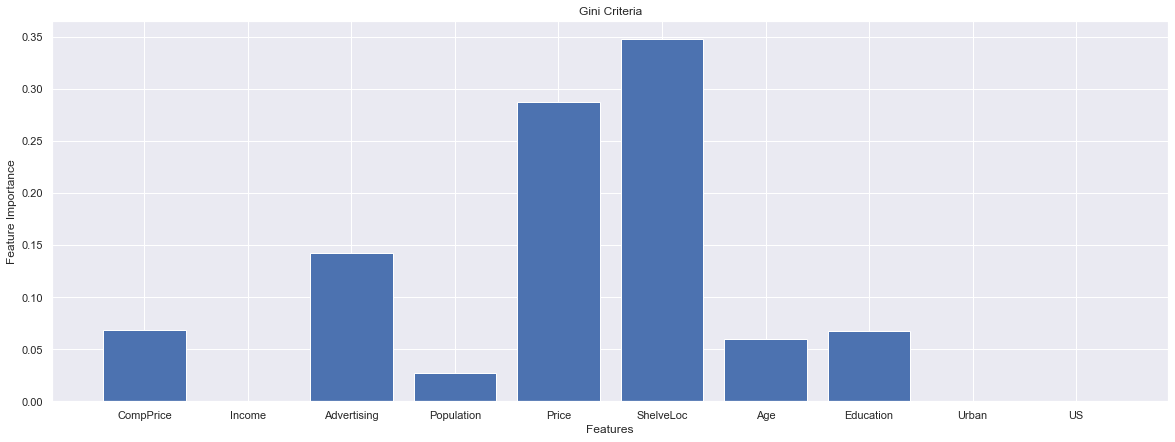

In [32]:
plt.figure(figsize=(20,7))
plt.bar(feature,feature_imp,)
plt.xlabel('Features')
plt.ylabel('Feature Importance')
plt.title('Gini Criteria')

In [ ]:
# by Entropy

In [33]:
feature_imp_e = model_entropy.feature_importances_
feature_imp_e

array([0.0523571 , 0.        , 0.11982126, 0.        , 0.34712995,
       0.39095092, 0.08974077, 0.        , 0.        , 0.        ])

In [34]:
features = model_entropy.feature_names_in_
features

array(['CompPrice', 'Income', 'Advertising', 'Population', 'Price',
       'ShelveLoc', 'Age', 'Education', 'Urban', 'US'], dtype=object)

Text(0.5, 1.0, 'Entropy Criteria')

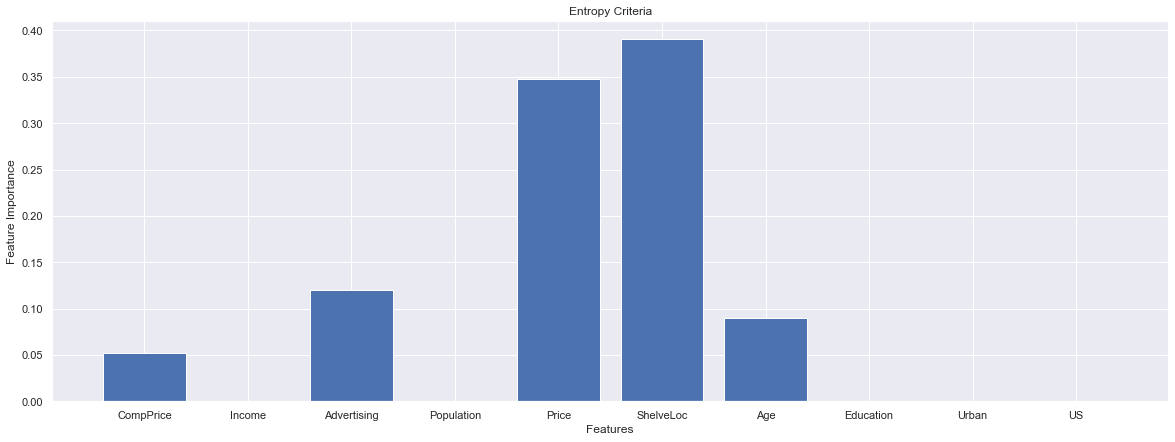

In [35]:
plt.figure(figsize=(20,7))
plt.bar(features,feature_imp_e,)
plt.xlabel('Features')
plt.ylabel('Feature Importance')
plt.title('Entropy Criteria')

In [ ]:
# from Above we can say that ShelveLoc & Price these two are main attributes for sales